# Теория вероятностей и математическая статистика

## Урок 2

## Дискретные случайные величины. Закон распределения вероятностей.  Биномиальный закон распределения. Распределение Пуассона

### Случайные величины

__Случайная величина__ — величина, которая в результате опыта принимает некоторое значение, неизвестное заранее.

__Дискретные__ случайные величины, как правило, принимают целые или рациональные значения. Эти значения отделены друг от друга, т.е. если случайная величина принимает значения $1$ и $2$, то она не обязана принимать промежуточные значения.

__Непрерывные__ случайные величины принимают вещественные значения. Здесь значения уже не отделены друг от друга, т.е. если непрерывная случайная величина принимает значения $1$ и $2$, то она также может принять и _любое_ значение между ними.

Примеры дискретных случайных величин:

1. Сумма очков при $100$-кратном подбрасывании игрального кубика.
2. Число метеоритов, упавших на Землю за год.
3. Количество машин, которые успевают проехать через данный светофор за один цикл.

__Пример 1__

Смоделируем стократное подбрасывание монетки. Рассмотрим случайную величину, равную числу выпаданий орла.

In [1]:
import numpy as np

In [14]:
np.random.randint(0, 2, size=100).sum()

49

Для генерации значений этой же случайной величины можно использовать функцию `binomial` (почему — обсудим ниже).

In [22]:
np.random.binomial(n=100, p=0.5)

48

Можно повторить этот эксперимент большее количество раз (например, $50$ раз) и посмотреть, какие получаются значения.

In [26]:
print(np.random.binomial(n=100, p=0.5, size=50))

[46 58 49 48 60 48 47 53 53 52 47 50 53 49 48 50 42 43 53 55 46 46 53 47
 49 55 51 50 48 49 52 53 51 51 45 56 54 54 50 43 53 49 50 47 51 41 54 54
 50 49]


Пусть $X$ — дискретная случайная величина. __Закон распределения__ этой случайной величины — это соответствие между значениями, которые принимает эта величина, и вероятностями, с которыми она их принимает.

__Пример 2__

Пусть $X$ — сумма значений двух подбрасываемых игральных кубиков. Вот её закон распределения:

<table border="3">
    <tr>
        <th>$x$</th>
        <td>2</td>
        <td>3</td>
        <td>4</td>
        <td>5</td>
        <td>6</td>
        <td>7</td>
        <td>8</td>
        <td>9</td>
        <td>10</td>
        <td>11</td>
        <td>12</td>
</tr>
    <tr>
        <th>$P(X=x)$</th>
        <td>0.028</td>
        <td>0.056</td>
        <td>0.083</td>
        <td>0.111</td>
        <td>0.139</td>
        <td>0.167</td>
        <td>0.139</td>
        <td>0.111</td>
        <td>0.083</td>
        <td>0.056</td>
        <td>0.028</td>
    </tr>
</table>

__Пример 3__

В урне $8$ шаров, из которых $5$ белых, остальные — чёрные. Наудачу вынимают $3$ шара. Найти закон распределения количества белых шаров в выборке.

Принимаемые значения данной случайной величины будут: $x_1 = 0$, $x_2 = 1$, $x_3 = 2$, $x_4 = 3$.

Посчитаем вероятность того, что $X = 0$, т.е. что среди трёх вытянутых шаров нет ни одного белого. Значит, вытянуты в точности все чёрные шары. Такое возможно лишь в одном случае.

Кстати, из скольки? Общее число способов вытянуть $3$ шара из урны с $8$ шарами — число сочетаний:
$$C_8^3 = \dfrac{8!}{3! \cdot 5!} = \dfrac{8 \cdot 7 \cdot 6}{6} = 56.$$

Итак, $P(X = 0) = \dfrac{1}{56}$.

Событие $X = 1$ означает, что среди вытянутых шаров один белый и два чёрных: $P(X = 1) = \dfrac{C_5^1 \cdot C_3^2}{56} = \dfrac{15}{56}$. Аналогично,
$$P(X = 2) = \dfrac{C_5^2 \cdot C_3^1}{56} = \dfrac{30}{56}, \:\:
P(X = 3) = \dfrac{C_5^3}{56} = \dfrac{10}{56}.$$

Заметим, что сумма этих четырёх вероятностей равна $1$.

Пусть $X$, $Y$ — дискретные случайные величины, причём $X$ принимает значения $x_i$ с вероятностями $P(X = x_i)$, $i = 1,2,\dots$, а $Y$ принимает значения $y_j$ с вероятностями $P(Y = y_j)$, $j = 1,2,\dots$.

* Их __сумма__ $Z = X + Y$ — случайная величина, которая принимает значения $z_{ij} = x_i + y_j$ с вероятностями $P(X = x_i, Y = y_j)$.
* Аналогично считаются __разность__ и __произведение__ случайных величин, надо лишь заменить соответствующие символы операций.
* __Квадрат__ $Z = X^2$ — случайная величина, которая принимает значения $z_i = x_i^2$ по тому же закону распределения, что и $X$.

__Пример 4__

В примере 2 мы записали закон распределения суммы значений при броске двух игральных кубиков. Сделаем то же самое с использованием свойства суммы случайных величин. 

Распределение значений при броске одного кубика имеет т.н. _равномерное распределение_: каждое из значений от $1$ до $6$ имеет одинаковую вероятность $P(X = k) = 1 / 6$.

Пусть $X$ — случайная величина, равная значению на первом кубике, а $Y$ — на втором кубике. Очевидно, величины $X$ и $Y$ независимы. Для независимых событий имеем:
$$P(X = i, Y = j) = P(X = i) \cdot P(Y = j) = 1 / 36,$$
где финальное равенство следует из того, что каждый множитель всегда равен $1 / 6$.

Нас интересует случайная величина $Z = X + Y$. По сформулированному выше свойству мы знаем, что случайная величина принимает всевозможные значения $z_{ij} = x_i + y_j$, причём каждая комбинация $(x_i, y_j)$ имеет одинаковую вероятность $1 / 36$. Список всех таких комбинаций можно получить с помощью функции `product` из библиотеки `itertools`:

In [27]:
from itertools import product

In [28]:
pairs = list(product(range(1, 7), repeat=2))
pairs[:10]

[(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4)]

Вероятность встретить каждую такую пару значений равна $1 / 36$:

In [30]:
probabilities = np.ones(len(pairs)) / 36
probabilities[:10]

array([0.02777778, 0.02777778, 0.02777778, 0.02777778, 0.02777778,
       0.02777778, 0.02777778, 0.02777778, 0.02777778, 0.02777778])

При этом нас интересуют не пары значений, а их суммы:

In [31]:
values = list(map(sum, pairs))
values[:10]

[2, 3, 4, 5, 6, 7, 3, 4, 5, 6]

Запишем соответствие между значениями случайной величины $Z$ и их вероятностями в виде таблицы:

In [32]:
import pandas as pd

In [33]:
z = pd.DataFrame({'value': values, 'probability': probabilities})
z.head(10)

,value,probability
0,2,0.027778
1,3,0.027778
2,4,0.027778
3,5,0.027778
4,6,0.027778
5,7,0.027778
6,3,0.027778
7,4,0.027778
8,5,0.027778
9,6,0.027778


От закона распределения нас отделяет только одно замечание: в столбце `value` имеются повторяющиеся значения. Это связано с тем, что одно и то же значение может быть суммой разных чисел. Поэтому чтобы получить закон распределения, сгруппируем эту таблицу по значениям в столбце `value` и просуммируем соответствующие вероятности:

In [34]:
z_probabilities = z.groupby('value')['probability'].sum()

z_probabilities

value
2     0.027778
3     0.055556
4     0.083333
5     0.111111
6     0.138889
7     0.166667
8     0.138889
9     0.111111
10    0.083333
11    0.055556
12    0.027778
Name: probability, dtype: float64

In [35]:
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')
%config InlineBackend.figure_formats = ['svg']

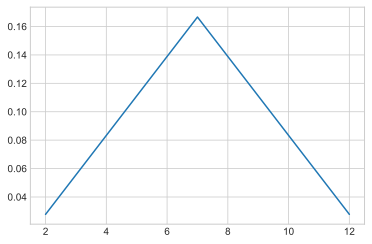

In [36]:
plt.plot(z_probabilities)

__Математическим ожиданием__ случайной величины $X$ называется среднее значение величины $X$ при стремлении количества испытаний к бесконечности. Обозначается $M(X)$.

Если $X$ — дискретная случайная величина, принимающая значения $x_i$ с вероятностями $p_i = P(X = x_i)$, $i = 1,2, \dots$, то
    $$M(X) = \displaystyle\sum_i p_i x_i = p_1 x_1 + p_2 x_2 + \dots$$

__Пример 5__

Посчитаем математическое ожидание случайной величины из примера 2.

In [37]:
x_values = np.arange(2, 13)

print(x_values)

[ 2  3  4  5  6  7  8  9 10 11 12]


In [38]:
x_probabilities = np.array([1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1]) / 36

print(x_probabilities)

[0.02777778 0.05555556 0.08333333 0.11111111 0.13888889 0.16666667
 0.13888889 0.11111111 0.08333333 0.05555556 0.02777778]


Чтобы посчитать математическое ожидание, нужно поэлементно перемножить значения этих двух массивов (первый с первым, второй со вторым и т.д.), затем сложить результаты:

In [39]:
x_values * x_probabilities

array([0.05555556, 0.16666667, 0.33333333, 0.55555556, 0.83333333,
       1.16666667, 1.11111111, 1.        , 0.83333333, 0.61111111,
       0.33333333])

In [40]:
m = (x_values * x_probabilities).sum()

print(m)

6.999999999999998


__Дисперсией__ случайной величины $X$ называется математическое ожидание квадрата отклонения случайной величины от её математического ожидания:
$$D(X) = M \left( (X - M(X))^2 \right).$$

Дисперсия является мерой разброса случайной величины относительно её среднего значения. 

__Пример 6__

Посчитаем дисперсию случайной величины из примера 2. Её математическое ожидание мы уже считали, оно равно:

In [41]:
m = 7
m

7

Далее, определим случайную величину $Y = X - M(X)$. Она будет принимать значения:

In [42]:
y_values = x_values - m

print(y_values)

[-5 -4 -3 -2 -1  0  1  2  3  4  5]


Отметим, что распределения вероятностей у величины $Y$ такое же, что и у $X$.

Далее, возведём эту величину в квадрат, тем самым получим новую случайную величину $Z$ со всё еще таким же распределением вероятностей:

In [43]:
z_values = y_values ** 2

print(z_values)

[25 16  9  4  1  0  1  4  9 16 25]


Итак, дисперсия случайной величины $X$ равна:

In [44]:
d = (z_values * x_probabilities).sum()

print(d)

5.833333333333334


### Законы распределения случайных величин

Пусть имеется некоторое событие $A$, которое наступает с вероятностью $p$. __Биномиальный закон__ описывает распределение случайной величины $X$, задающей число наступлений события $A$ в ходе проведения $n$ независимых опытов.

Биномиальный закон распределения описывается __формулой Бернулли__:
$$P(X = k) = C_n^k p^k (1 - p)^{n - k}$$

__Пример 7__

Доказать формулу Бернулли довольно легко, используя уже известные нам правила комбинаторики. То, что событие $A$ в результате проведения $n$ независимых опытов наступило $k$ раз означает, что $n - k$ раз наступило событие $\overline{A}$. Вероятность наступления такого события равна $1 - p$. 

При этом наступить событие $A$ могло в любые $k$ «моментов» из $n$, поэтому число вариантов таких «моментов» равно $C_n^k$. Наконец, эксперименты проводились независимо, поэтому итоговая вероятность равна $C_n^k p^k (1 - p)^{n - k}$.

Математическое ожидание и дисперсию для биномиально распределённой дискретной величины можно вычислить по формулам:
$$M(X) = np, \: D(X) = np(1 - p).$$

__Пример 8__

Посчитаем распределение числа выпаданий орла при трёхкратном подбрасывании монеты. Возможные значения такой случайной величины: $x_1 = 0$, $x_2 = 1$, $x_3 = 2$, $x_4 = 3$.

Посчитаем вероятность каждого значения:
$$P(X = 0) = C_n^k p^k (1 - p)^{n - k} = C_3^0 \cdot 0.5^0 \cdot 0.5^3 = \frac{3!}{0! \: (3-0)!} \cdot 0.5^0 \cdot 0.5^3 = 1 \cdot 1 \cdot 0.125 = 0.125.$$
$$P(X = 1) = C_3^1 \cdot 0.5^1 \cdot 0.5^2 = \frac{3!}{1! \: 2!} \cdot 0.5^1 \cdot 0.5^2 = 3 \cdot 0.5 \cdot 0.25 = 0.375.$$
$$P(X = 2) = C_3^2 \cdot 0.5^2 \cdot 0.5^1 = \frac{3!}{2! \: 1!} \cdot 0.5^2 \cdot 0.5^1 = 0.375.$$
$$P(X = 3) = C_3^3 \cdot 0.5^3 \cdot 0.5^0 = \frac{3!}{3! \: 0!} \cdot 0.5^3 \cdot 0.5^0 = 0.125.$$

Итак, закон распределения такой случайной величины:

<table border="3">
    <tr>
        <th>$x$</th>
        <td>0</td>
        <td>1</td>
        <td>2</td>
        <td>3</td>
    </tr>
    <tr>
        <th>$P(X = x)$</th>
        <td>0.125</td>
        <td>0.375</td>
        <td>0.375</td>
        <td>0.125</td>
    </tr>
</table>

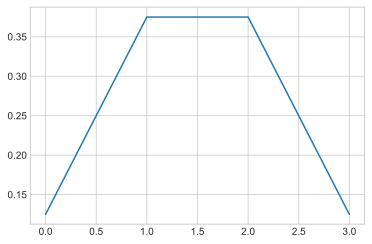

In [45]:
plt.plot([1 / 8, 3 / 8, 3 / 8, 1 / 8])

__Пример 9__

Посчитаем математическое ожидание распределения из предыдущего примера. Поскольку $n = 3$ и $p = 0.5$, получаем:
$$M(X) = 3 \cdot 0.5 = 1.5.$$

Результат можно понимать так: в среднем при трёхкратном подбрасывании монеты орёл выпадает $1.5$ раза.

Дисперсия такой величины:
$$D(X) = 3 \cdot 0.5 \cdot (1 - 0.5) = 0.75.$$

__Распределение Пуассона__

Допустим теперь, что имеется некоторый поток событий, такой, что в среднем за единицу времени событие наступает $\lambda$ раз (т.е. с _интенсивностью_ $\lambda$). Тогда случайная величина $X$, равная количеству наступлений события за единицу времени, имеет __распределение Пуассона__ с параметром $\lambda$.

Случайная величина $X$ принимает значения $0, 1, 2, \dots$ (счётное множество значений), а соответствующие вероятности выражаются __формулой Пуассона__:
$$P(X = k) = \dfrac{\lambda^k e^{-\lambda}}{k!}$$

Здесь $\lambda$ — положительное вещественное число.

Как мы уже отметили, распределение Пуассона описывает счётчики событий, наступивших за единицу времени. Например, распределение Пуассона описывает:
* число бракованных деталей в партии фиксированного размера,
* число опечаток в тексте фиксированного размера,
* число автобусов, проехавших за фиксированное время мимо автобусной остановки.

Математическое ожидание и дисперсия распределения Пуассона равны:
$$M(X) = D(X) = \lambda$$

__Пример 10__

В среднем за час мимо автобусной остановки проезжают 30 автобусов. Какова вероятность, что за час мимо остановки проедут: а) 30 автобусов? б) не более 15 автобусов? в) более 50 автобусов?

Для решения первого пункта достаточно прямо применить формулу Пуассона:
$$P(X = 30) = \dfrac{30^{30} e^{-30}}{30!}$$

In [46]:
def poisson_proba(k: int, lambda_: float) -> float:
    """Формула Пуассона.
    """
    
    return (lambda_ ** k) * (np.exp(-lambda_)) / np.math.factorial(k)

In [47]:
lambda_ = 30

In [48]:
poisson_proba(k=30, lambda_=lambda_)

0.07263452647159149

Для решения второго пункта нужно сложить несколько вероятностей. Вероятность получить не более 15 автобусов предполагает получение от 0 до 15 автобусов:
$$P(X \leq 15) = \displaystyle\sum_{i = 0}^{15} \dfrac{30^{i} e^{-30}}{i!}$$

In [49]:
sum(poisson_proba(k=i, lambda_=lambda_) for i in range(16))

0.0019474797778723065

Последний пункт наиболее хитрый. Вероятность получить более 50 автобусов предполагает получение от 50... до скольки? В принципе число автобусов, проезжающих мимо автобусной остановки за час, не ограничено. Так что суммировать придётся до бесконечности, что невозможно.

Пойдём другим способом. Мы знаем, что сумма вероятностей случайной величины всегда равна $1$. Значит, вероятность получить более 50 автобусов равна:
$$P(X > 50) = 1 - P(X \leq 50)$$

In [50]:
1 - sum(poisson_proba(k=i, lambda_=lambda_) for i in range(51))

0.0002980129818267452

Распределение Пуассона является предельным случаем биномиального. Если в последнем имеется очень большое число экспериментов ($n \rightarrow \infty$), а вероятность наступления события $A$ достаточно мала (можно считать, что $p \approx \lambda/n$), то такое распределение становится очень похоже на распределение Пуассона с параметром $\lambda = np$.

__Другие дискретные распределения__

* __Распределение Бернулли__. Событие $A$ наступает с вероятностью $p$. Индикатор наступления этого события, т.е.
$$X = \begin{cases} 1, & \text{событие $A$ произошло,} \\ 0 & \text{иначе,} \end{cases}$$
имеет распределение Бернулли. Вероятности:
$$P(X = 1) = p, \:\: P(X = 0) = 1 - p$$
_Замечание_. Биномиальное распределение с параметрами $n$, $p$ является суммой $n$ распределений Бернулли с параметром $p$.

* __Дискретное равномерное распределение__. Случайная величина $X$ принимает $n$ различных значений с одинаковой вероятностью $1/n$. Не путать с _непрерывным равномерным_.

* __Геометрическое распределение__. Событие $A$ наступает с вероятностью $p$. Случайная величина $X$, равная числу независимых испытаний до первого наступления события $A$, имеет геометрическое распределение. Вероятности:
$$P(X = k) = (1 - p)^k \cdot p$$